In [1]:
import sys
sys.path.insert(1, '/home/UOCNT/bsc54/code/ImageVelocimetry/functions/')
from TST_fun import *

import matplotlib.pyplot as plt

import datetime   
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20,10] 

In [7]:
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
tiv_basepath = "/media/data_sdc1/TAS_data/2020/Tier03/"
#org_basepath = "/data/onedrive/Freiburg_Chch_METEO/data/Experiment02/Level01/"
Tas1 = readnetcdftoarr(tiv_basepath+"min_mean_TAS1.nc",var= "Tb")
Tas1_restart = readnetcdftoarr(tiv_basepath+"min_mean_TAS1_restart.nc",var= "Tb")
Tas2 = readnetcdftoarr(tiv_basepath+"min_mean_TAS2.nc",var= "Tb")

In [2]:
Tas1 = np.flip(Tas1, (1))
Tas1_restart = np.flip(Tas1_restart, (1))
Tas2 = np.flip(Tas2, (1))

In [8]:
Tas1_pix = Tas1[:,100,75]
Tas1_restart_pix = Tas1_restart[:,100,75]
Tas2_pix = Tas2[:,100,75]

In [18]:
Tas1_start = datetime.datetime(2020, 2, 24, 6, 13, 21) + datetime.timedelta(hours = 13)       # Random date in the past
Tas1_end = Tas1_start + datetime.timedelta(minutes = len(Tas1_pix))

Tas1_restart_start = datetime.datetime(2020, 2, 25, 19, 50, 31)   + datetime.timedelta(hours = 13)      # Random date in the past
Tas1_restart_end = Tas1_restart_start + datetime.timedelta(minutes = len(Tas1_restart_pix))

Tas2_start = datetime.datetime(2020, 2, 25, 23, 50, 53)  + datetime.timedelta(hours = 13)       # Random date in the past
Tas2_end = Tas2_start + datetime.timedelta(minutes = len(Tas2_pix))


In [10]:
time_range = [dt for dt in datetime_range(Tas1_start,Tas2_end, datetime.timedelta(minutes = 1))]

In [11]:
minutes_diff_Tas1_restart = (Tas1_end - Tas1_restart_start).total_seconds()/60
minutes_diff_Tas2 = (Tas1_restart_end - Tas2_start).total_seconds()/60
first_gap = int(np.round(minutes_diff_Tas1_restart)*-1)
second_gap = int(np.round(minutes_diff_Tas2)*-1)

first_gap_nan = np.empty(first_gap) 
first_gap_nan[:] = np.nan

second_gap_nan = np.empty(second_gap) 
second_gap_nan[:] = np.nan

In [13]:
Tas1_full = np.concatenate((Tas1_pix,first_gap_nan))
Tas1_full = np.concatenate((Tas1_full,Tas1_restart_pix))
Tas2_full = np.concatenate((second_gap_nan,Tas2_pix))




In [25]:
Tas_pix_full= np.concatenate((Tas1_full, Tas2_full))

In [15]:
Tas_pix_full = create_tst_mean(Tas_pix_full,10)
#Tas_pix_full2 = create_tst_mean(Tas_pix_full2,10)

[========================================================================] 100%


In [16]:
dates = matplotlib.dates.date2num(time_range)

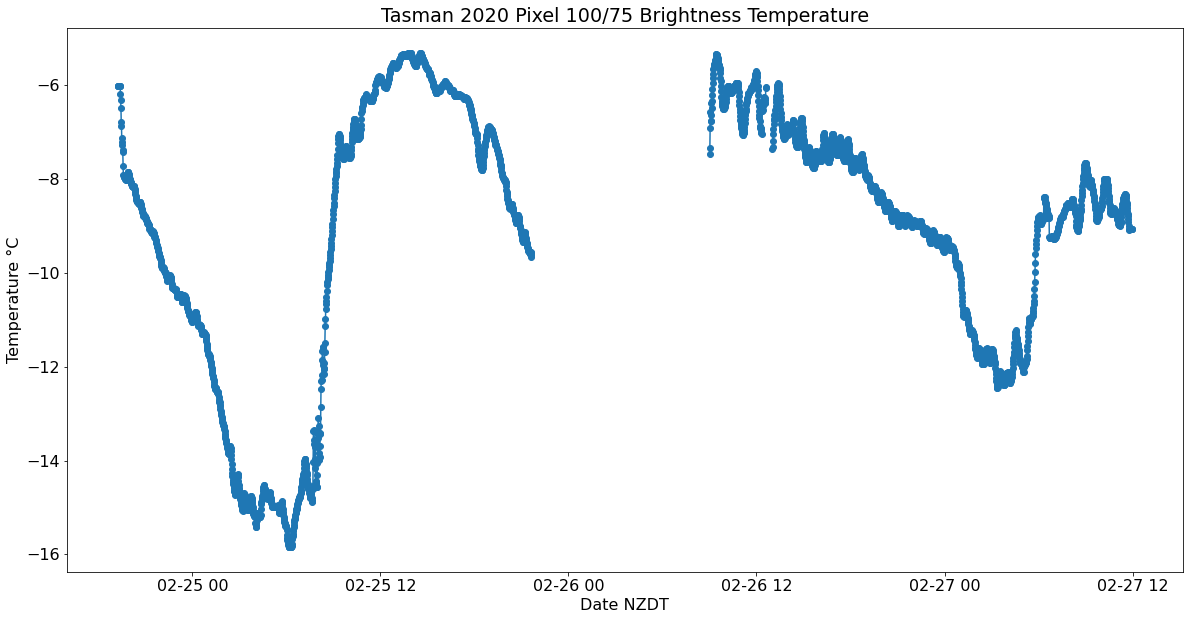

In [23]:
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot_date(time_range[:-1],Tas_pix_full, ls="solid")
plt.title("Tasman 2020 Pixel 100/75 Brightness Temperature")
plt.xlabel("Date NZDT")
plt.ylabel("Temperature °C")

fig.savefig(tiv_basepath+"TAS2020_pix"+".png", bbox_inches='tight')
#plt.plot_date(time_range[:-1],Tas_pix_full2, ls="solid")

In [24]:
Tas1_pix2 = Tas1[:,165,60]
Tas1_restart_pix2 = Tas1_restart[:,165,60]
Tas2_pix2 = Tas2[:,165,60]

In [ ]:
Tas1_full2 = np.concatenate((Tas1_pix2,first_gap_nan))
Tas1_full2 = np.concatenate((Tas1_full2,Tas1_restart_pix2))
Tas2_full2 = np.concatenate((second_gap_nan,Tas2_pix2))

In [ ]:
Tas_pix_full2= np.concatenate((Tas1_full2, Tas2_full2))